In [1]:
#importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
#Using pandas dataframe to read the dataset.
DF=pd.read_csv('project_data.csv') 

In [3]:
DF.head()

,Country Name,Continent,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services,Comp.education
0,Afghanistan,Asia,189,64.833,97.700000,NaN,NaN,46.4,84.330589,2.313073,58.269395,38041757.0,65.806030,13.242202,NaN,3.911603,494.179350,31.802,26.798956,9
1,Albania,Europe,"1,210",78.573,100.000000,0.146477,0.574018,8.6,103.322746,-0.426007,104.167555,2854191.0,NaN,NaN,11.47,2.113420,5395.659532,11.620,70.665854,9
2,Algeria,Africa,152,76.880,99.500000,2.938149,0.966470,20.0,101.364632,1.933983,18.076295,43053054.0,248.205872,6.243371,NaN,1.000000,3989.668276,23.583,73.139746,10
3,Andorra,Europe,"1,949",NaN,100.000000,NaN,NaN,2.5,NaN,0.179042,164.140425,77146.0,2744.194336,6.711585,NaN,2.015548,40897.330870,7.000,90.640003,10
4,Angola,Africa,55,61.147,45.670315,1.122570,-2.104145,49.9,NaN,3.242914,25.527632,31825299.0,71.326004,2.533360,NaN,-0.624644,2809.626088,40.232,NaN,6


In [4]:
def red_data(DF):
    return pd.DataFrame({"Data Type":DF.dtypes,"No of Unique Data":DF.apply(lambda x: x.nunique(),axis=0),
                       "Levels":DF.apply(lambda x: str(x.unique()),axis = 0),"Null_values":DF.isnull().sum(),'null%':(DF.isnull().sum()/100),'skewness':DF.skew(),'kurtosis':DF.kurt()})
red_data(DF)

,Data Type,No of Unique Data,Levels,Null_values,null%,skewness,kurtosis
Birth.rate,float64,159,[31.802 11.62 23.583 7. 40.232 15.107 16....,6,0.06,0.685389,-0.688229
Comp.education,object,14,['9' '10' '6' '11' '14' '12' '13' '5' '8' nan ...,13,0.13,NaN,NaN
Continent,object,6,['Asia' 'Europe' 'Africa' 'North America' 'Sou...,2,0.02,NaN,NaN
Country Name,object,185,['Afghanistan' 'Albania' 'Algeria' 'Andorra' '...,1,0.01,NaN,NaN
Covid.deaths,object,169,"['189' '1,210' '152' '1,949' '55' '1,360' '2,7...",1,0.01,NaN,NaN
Elect.access,float64,81,[ 97.7 100. 99.5 45.67...,1,0.01,-1.664361,1.520868
GDP.capita,float64,176,[ 494.1793499 5395.659532 3989.668276 ...,10,0.10,3.011155,11.922295
GDP.growth,float64,175,[ 3.91160342e+00 2.11341998e+00 1.00000000e+...,11,0.11,0.281172,5.001558
Health.exp,float64,167,[13.24220181 nan 6.24337101 6.711585...,19,0.19,0.604704,0.556653
Health.exp.capita,float64,167,[ 65.80603027 nan 248.2058716 ...,19,0.19,2.484345,6.739356


In [5]:
DF.tail()

,Country Name,Continent,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services,Comp.education
181,Vietnam,Asia,410,75.400,99.400000,7.059741,6.042941,16.9,NaN,0.954289,311.097842,96462108.0,180.718185,5.249656,2.040000,7.017435,2715.275980,16.454,NaN,10
182,"Yemen, Rep.",Asia,69,66.125,72.751701,NaN,NaN,46.4,NaN,2.300594,55.234051,29161922.0,NaN,NaN,NaN,NaN,NaN,29.873,NaN,9
183,Zambia,Africa,206,63.886,43.000000,NaN,NaN,42.9,NaN,2.893018,24.026465,17861034.0,69.324379,5.312203,12.520000,1.441306,1305.001031,35.776,NaN,7
184,Zimbabwe,Africa,355,61.490,41.089108,NaN,NaN,38.1,88.508812,1.421142,37.858273,14645473.0,103.028272,7.703565,16.860001,-6.144236,1316.740657,29.747,29.673569,7
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
DF.dtypes

Country Name              object
Continent                 object
Covid.deaths              object
Life.expec               float64
Elect.access             float64
Net.nat.income           float64
Net.nat.income.capita    float64
Mortality.rate           float64
Primary                  float64
Pop.growth               float64
Pop.density              float64
Pop.total                float64
Health.exp.capita        float64
Health.exp               float64
Unemployment             float64
GDP.growth               float64
GDP.capita               float64
Birth.rate               float64
Water.services           float64
Comp.education            object
dtype: object

In [7]:
DF.describe()

,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services
count,177.000000,185.000000,133.000000,133.000000,172.000000,115.000000,184.000000,185.000000,1.840000e+02,167.000000,167.000000,112.000000,175.000000,176.000000,180.000000,108.000000
mean,73.012812,85.731455,4.280545,2.931443,20.456395,92.899360,1.241058,377.319404,4.117526e+07,1196.707665,6.431587,7.348571,2.918907,18851.172657,19.393550,73.600288
std,7.488963,24.995954,6.105832,5.879021,19.388048,12.962837,1.124111,1634.905990,1.492641e+08,1915.710773,2.589611,5.237680,3.108137,28892.492783,9.887596,29.486008
min,54.239000,6.720535,-14.378665,-17.347416,1.600000,54.728691,-1.609508,2.071058,3.370600e+04,19.849976,1.525117,0.100000,-7.157247,228.213589,5.900000,5.581210
25%,67.273000,83.500000,1.304721,0.529697,5.250000,86.198116,0.426508,35.893176,2.116046e+06,73.802731,4.398296,3.787500,1.282986,2072.458521,10.500000,55.385905
50%,74.475000,100.000000,3.653306,2.637275,13.050000,97.407173,1.164656,84.195271,9.370390e+06,370.109955,6.243371,5.350000,2.653066,6731.239846,17.337000,87.083539
75%,78.497561,100.000000,6.270332,5.076274,31.625000,101.170357,1.987952,217.007630,3.037900e+07,1254.540528,8.102088,9.952500,4.889622,23347.392970,27.135250,98.731394
max,85.078049,100.000000,50.171896,47.251771,82.400000,120.447342,4.468688,19223.976320,1.407745e+09,10921.012700,16.767063,28.469999,19.535810,189487.147100,45.637000,100.000000


In [8]:
DF.isna().sum()

Country Name              1
Continent                 2
Covid.deaths              1
Life.expec                9
Elect.access              1
Net.nat.income           53
Net.nat.income.capita    53
Mortality.rate           14
Primary                  71
Pop.growth                2
Pop.density               1
Pop.total                 2
Health.exp.capita        19
Health.exp               19
Unemployment             74
GDP.growth               11
GDP.capita               10
Birth.rate                6
Water.services           78
Comp.education           13
dtype: int64

In [9]:
#replacing comma and converting object type to numeric
DF['Covid.deaths'] = DF['Covid.deaths'].str.replace(',', '').astype(float)

In [10]:
DF

,Country Name,Continent,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services,Comp.education
0,Afghanistan,Asia,189.0,64.833,97.700000,NaN,NaN,46.4,84.330589,2.313073,58.269395,38041757.0,65.806030,13.242202,NaN,3.911603,494.179350,31.802,26.798956,9
1,Albania,Europe,1210.0,78.573,100.000000,0.146477,0.574018,8.6,103.322746,-0.426007,104.167555,2854191.0,NaN,NaN,11.470000,2.113420,5395.659532,11.620,70.665854,9
2,Algeria,Africa,152.0,76.880,99.500000,2.938149,0.966470,20.0,101.364632,1.933983,18.076295,43053054.0,248.205872,6.243371,NaN,1.000000,3989.668276,23.583,73.139746,10
3,Andorra,Europe,1949.0,NaN,100.000000,NaN,NaN,2.5,NaN,0.179042,164.140425,77146.0,2744.194336,6.711585,NaN,2.015548,40897.330870,7.000,90.640003,10
4,Angola,Africa,55.0,61.147,45.670315,1.122570,-2.104145,49.9,NaN,3.242914,25.527632,31825299.0,71.326004,2.533360,NaN,-0.624644,2809.626088,40.232,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vietnam,Asia,410.0,75.400,99.400000,7.059741,6.042941,16.9,NaN,0.954289,311.097842,96462108.0,180.718185,5.249656,2.040000,7.017435,2715.275980,16.454,NaN,10
182,"Yemen, Rep.",Asia,69.0,66.125,72.751701,NaN,NaN,46.4,NaN,2.300594,55.234051,29161922.0,NaN,NaN,NaN,NaN,NaN,29.873,NaN,9
183,Zambia,Africa,206.0,63.886,43.000000,NaN,NaN,42.9,NaN,2.893018,24.026465,17861034.0,69.324379,5.312203,12.520000,1.441306,1305.001031,35.776,NaN,7
184,Zimbabwe,Africa,355.0,61.490,41.089108,NaN,NaN,38.1,88.508812,1.421142,37.858273,14645473.0,103.028272,7.703565,16.860001,-6.144236,1316.740657,29.747,29.673569,7


In [11]:
#dividing numerical and categorical features from the dataset.
numeric_features=DF.select_dtypes(include=np.number)
print((numeric_features.columns))data

categorical_features=DF.select_dtypes(include=object)
print(categorical_features.columns)

Index(['Covid.deaths', 'Life.expec', 'Elect.access', 'Net.nat.income',
       'Net.nat.income.capita', 'Mortality.rate', 'Primary', 'Pop.growth',
       'Pop.density', 'Pop.total', 'Health.exp.capita', 'Health.exp',
       'Unemployment', 'GDP.growth', 'GDP.capita', 'Birth.rate',
       'Water.services'],
      dtype='object')
Index(['Country Name', 'Continent', 'Comp.education'], dtype='object')


In [12]:
def red_data(DF):
    return pd.DataFrame({"Data Type":DF.dtypes,"No of Unique Data":DF.apply(lambda x: x.nunique(),axis=0),
                       "Levels":DF.apply(lambda x: str(x.unique()),axis = 0),"Null_values":DF.isnull().sum(),'null%':(DF.isnull().sum()/100),'skewness':DF.skew(),'kurtosis':DF.kurt()})
red_data(DF)

,Data Type,No of Unique Data,Levels,Null_values,null%,skewness,kurtosis
Birth.rate,float64,159,[31.802 11.62 23.583 7. 40.232 15.107 16....,6,0.06,0.685389,-0.688229
Comp.education,object,14,['9' '10' '6' '11' '14' '12' '13' '5' '8' nan ...,13,0.13,NaN,NaN
Continent,object,6,['Asia' 'Europe' 'Africa' 'North America' 'Sou...,2,0.02,NaN,NaN
Country Name,object,185,['Afghanistan' 'Albania' 'Algeria' 'Andorra' '...,1,0.01,NaN,NaN
Covid.deaths,float64,169,[1.890e+02 1.210e+03 1.520e+02 1.949e+03 5.500...,1,0.01,1.363429,1.833636
Elect.access,float64,81,[ 97.7 100. 99.5 45.67...,1,0.01,-1.664361,1.520868
GDP.capita,float64,176,[ 494.1793499 5395.659532 3989.668276 ...,10,0.10,3.011155,11.922295
GDP.growth,float64,175,[ 3.91160342e+00 2.11341998e+00 1.00000000e+...,11,0.11,0.281172,5.001558
Health.exp,float64,167,[13.24220181 nan 6.24337101 6.711585...,19,0.19,0.604704,0.556653
Health.exp.capita,float64,167,[ 65.80603027 nan 248.2058716 ...,19,0.19,2.484345,6.739356


In [13]:
#filling na values with mean and mode for respective columns.
for i in numeric_features:
  DF[i].fillna(DF[i].mean(), inplace=True)

DF.isna().sum()
DF['Comp.education'].fillna(DF['Comp.education'].mode()[0], inplace=True)
DF=DF.dropna()

In [14]:
DF

,Country Name,Continent,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services,Comp.education
0,Afghanistan,Asia,189.0,64.833000,97.700000,4.280545,2.931443,46.4,84.330589,2.313073,58.269395,38041757.0,65.806030,13.242202,7.348571,3.911603,494.179350,31.802,26.798956,9
1,Albania,Europe,1210.0,78.573000,100.000000,0.146477,0.574018,8.6,103.322746,-0.426007,104.167555,2854191.0,1196.707665,6.431587,11.470000,2.113420,5395.659532,11.620,70.665854,9
2,Algeria,Africa,152.0,76.880000,99.500000,2.938149,0.966470,20.0,101.364632,1.933983,18.076295,43053054.0,248.205872,6.243371,7.348571,1.000000,3989.668276,23.583,73.139746,10
3,Andorra,Europe,1949.0,73.012812,100.000000,4.280545,2.931443,2.5,92.899360,0.179042,164.140425,77146.0,2744.194336,6.711585,7.348571,2.015548,40897.330870,7.000,90.640003,10
4,Angola,Africa,55.0,61.147000,45.670315,1.122570,-2.104145,49.9,92.899360,3.242914,25.527632,31825299.0,71.326004,2.533360,7.348571,-0.624644,2809.626088,40.232,73.600288,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,"Venezuela, RB",South America,199.0,72.064000,100.000000,4.280545,2.931443,21.1,92.899360,-1.293638,32.329039,28515829.0,338.825378,5.367084,7.348571,2.918907,18851.172657,17.566,73.600288,17
181,Vietnam,Asia,410.0,75.400000,99.400000,7.059741,6.042941,16.9,92.899360,0.954289,311.097842,96462108.0,180.718185,5.249656,2.040000,7.017435,2715.275980,16.454,73.600288,10
182,"Yemen, Rep.",Asia,69.0,66.125000,72.751701,4.280545,2.931443,46.4,92.899360,2.300594,55.234051,29161922.0,1196.707665,6.431587,7.348571,2.918907,18851.172657,29.873,73.600288,9
183,Zambia,Africa,206.0,63.886000,43.000000,4.280545,2.931443,42.9,92.899360,2.893018,24.026465,17861034.0,69.324379,5.312203,12.520000,1.441306,1305.001031,35.776,73.600288,7


In [15]:
DF.isna().sum()
# Checking duplicate values in the dataset.
print(len(DF[DF.duplicated()]))

0


<AxesSubplot:>

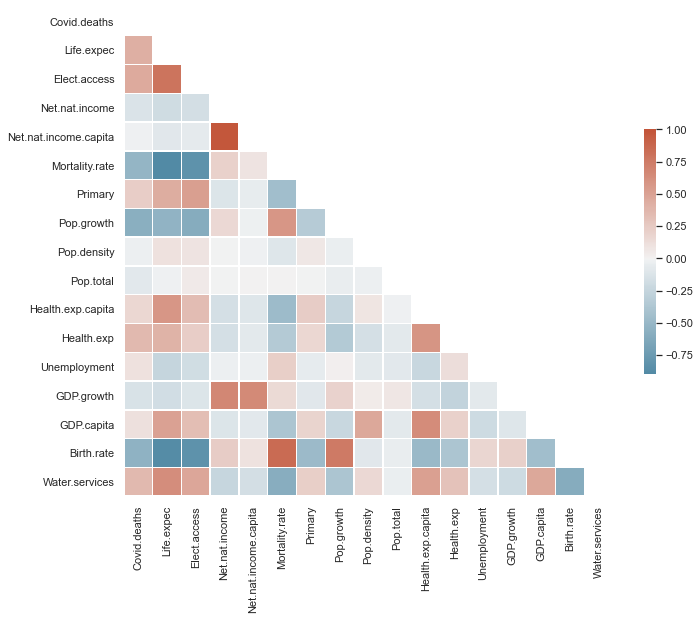

In [16]:
from string import ascii_letters
sns.set(style="white")
corr = DF.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Covid.deaths               AxesSubplot(0.125,0.816017;0.0383663x0.0639831)
Life.expec               AxesSubplot(0.17104,0.816017;0.0383663x0.0639831)
Elect.access             AxesSubplot(0.217079,0.816017;0.0383663x0.0639...
Net.nat.income           AxesSubplot(0.263119,0.816017;0.0383663x0.0639...
Net.nat.income.capita    AxesSubplot(0.309158,0.816017;0.0383663x0.0639...
Mortality.rate           AxesSubplot(0.355198,0.816017;0.0383663x0.0639...
Primary                  AxesSubplot(0.401238,0.816017;0.0383663x0.0639...
Pop.growth               AxesSubplot(0.447277,0.816017;0.0383663x0.0639...
Pop.density              AxesSubplot(0.493317,0.816017;0.0383663x0.0639...
Pop.total                AxesSubplot(0.539356,0.816017;0.0383663x0.0639...
Health.exp.capita        AxesSubplot(0.585396,0.816017;0.0383663x0.0639...
Health.exp               AxesSubplot(0.631436,0.816017;0.0383663x0.0639...
Unemployment             AxesSubplot(0.677475,0.816017;0.0383663x0.0639...
GDP.growth               

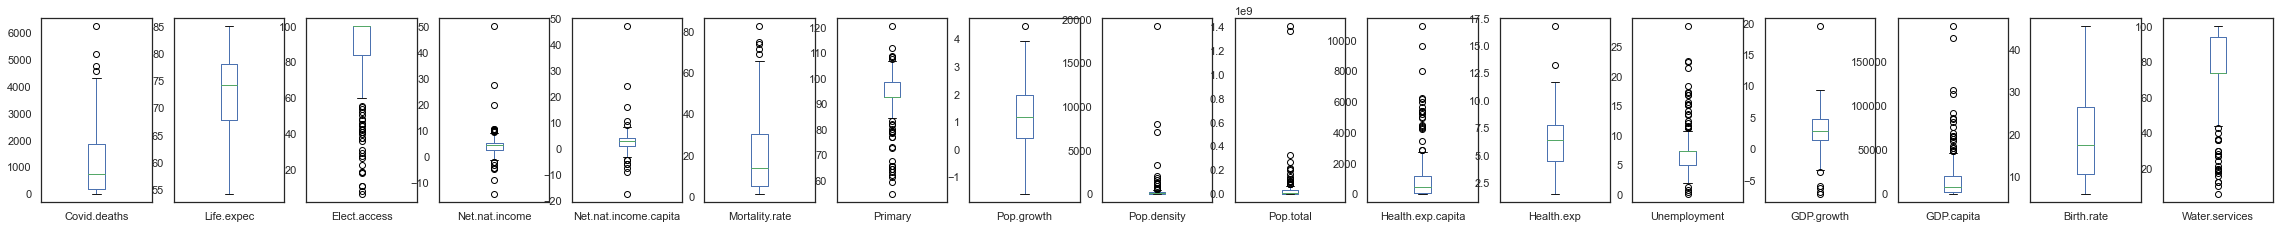

In [17]:
DF.plot(kind='box',layout=(10,17),subplots=1,figsize=(40,40))

In [18]:
def removing_outliers(DF):
    for col in numeric_features:
        if (((DF[col].dtype)=='float') | ((DF[col].dtype)=='float')):
            percentiles = DF[col].quantile([0.01,0.99]).values
            DF[col][DF[col] <= percentiles[0]] = percentiles[0]
            DF[col][DF[col] >= percentiles[1]] = percentiles[1]
        else:
            DF[col]=DF[col]
    return DF

In [19]:
DF=removing_outliers(DF)
DF.shape

<ipython-input-18-637e945b21a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col][DF[col] <= percentiles[0]] = percentiles[0]
C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-18-637e945b21a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col][DF[col] >= percentiles[1]] = percentiles[1]
C:\Users\User\anaco

(184, 20)

In [20]:
DF.describe()

,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,1139.225543,73.006815,85.848716,4.126954,2.771528,20.427202,92.906318,1.232297,310.418700,3.180546e+07,1180.821855,6.412254,7.319349,2.871379,18338.572457,19.308945,73.641601
std,1186.601323,7.319665,24.935314,3.676735,3.477883,18.588456,9.916281,1.102879,971.694971,6.877251e+07,1721.453706,2.349649,3.920373,2.760629,25114.644349,9.670426,22.427483
min,7.150000,54.626480,10.611782,-5.432739,-7.599747,1.800000,60.891660,-1.212963,3.252157,3.816442e+04,20.570190,2.098766,0.682600,-6.253034,481.465978,7.000000,11.722175
25%,168.500000,67.803250,83.911180,2.434446,1.102376,5.575000,92.899360,0.426508,37.366999,2.160750e+06,101.914496,4.490085,4.980000,1.408859,2242.433847,10.500000,73.600288
50%,731.000000,74.231341,100.000000,4.280545,2.931443,14.300000,92.899360,1.164656,84.419253,9.582936e+06,488.775757,6.431587,7.348571,2.918907,7497.688008,17.481500,73.600288
75%,1855.000000,78.085098,100.000000,5.083793,4.068128,30.600000,98.728998,1.966827,217.918827,3.076972e+07,1196.707665,7.833810,7.348571,4.747753,20560.902280,26.509500,93.789443
max,4848.100000,83.815627,100.000000,21.247824,17.572554,74.136000,109.391505,3.817522,7301.990388,5.048049e+08,8289.417739,11.959891,22.468901,8.550507,127080.069281,41.598600,100.000000


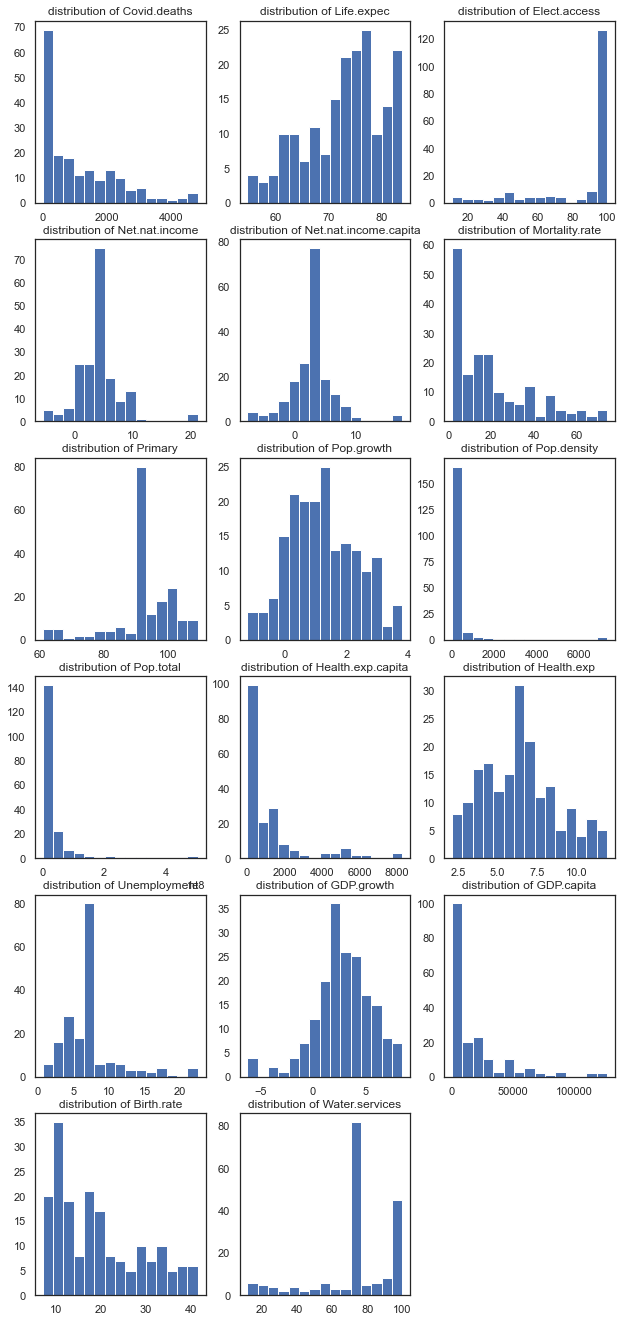

In [21]:
#Analysis of data distribution for numerical columns

plt.figure(figsize=(14,12))
for i,j in zip(range(1, 18),numeric_features):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.7,top=1.6)
    plt.hist(DF[j], bins = 15)
    plt.title('distribution of {}'.format(j))

plt.savefig('Histogram.png')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                  Country  Total deaths
0                    Peru        4848.1
1  Bosnia and Herzegovina        4775.0
2                 Hungary        4604.0
3         North Macedonia        4344.0
4              Montenegro        4273.0
5                 Georgia        4101.0
6                 Croatia        3734.0
7          Czech Republic        3615.0
8         Slovak Republic        3410.0
9                 Romania        3356.0


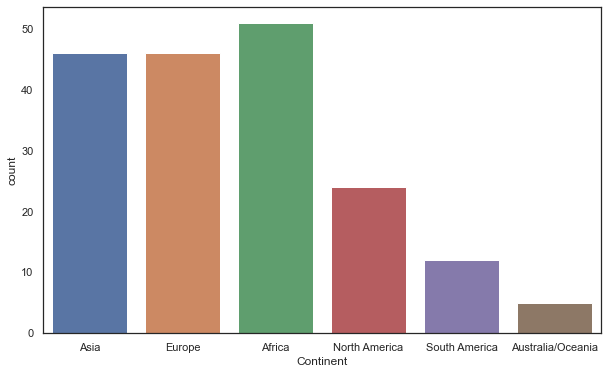

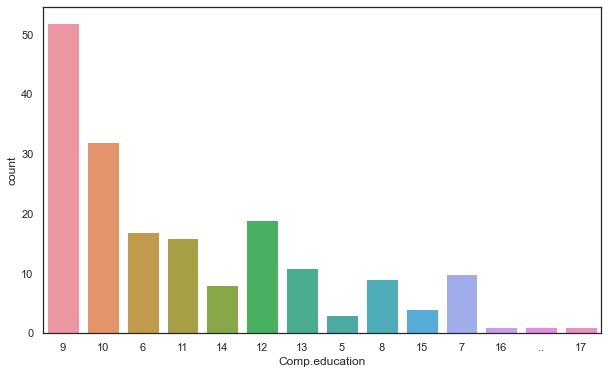

In [22]:
#Analysis of categorical columns i.e continent column

plt.figure(figsize=(10,6))
sns.countplot(DF['Continent'])
plt.savefig('barplot.png')

#Analysis of categorical columns i.e comp.education column
plt.figure(figsize=(10,6))
sns.countplot(DF['Comp.education'])
plt.savefig('barplot.png')

covid_deaths = DF.groupby('Country Name')['Covid.deaths'].sum()
covid_deaths = covid_deaths.sort_values(ascending=False)
deaths_covid = covid_deaths[1:11].index

deaths = covid_deaths[1:11].values 
covid_dea = pd.DataFrame({'Country': deaths_covid, 'Total deaths': deaths})
print(covid_dea)

           Continent  Total deaths
0      North America      31734.00
1               Asia      27922.15
2      South America      27761.10
3             Africa      16065.15
4  Australia/Oceania       3471.00


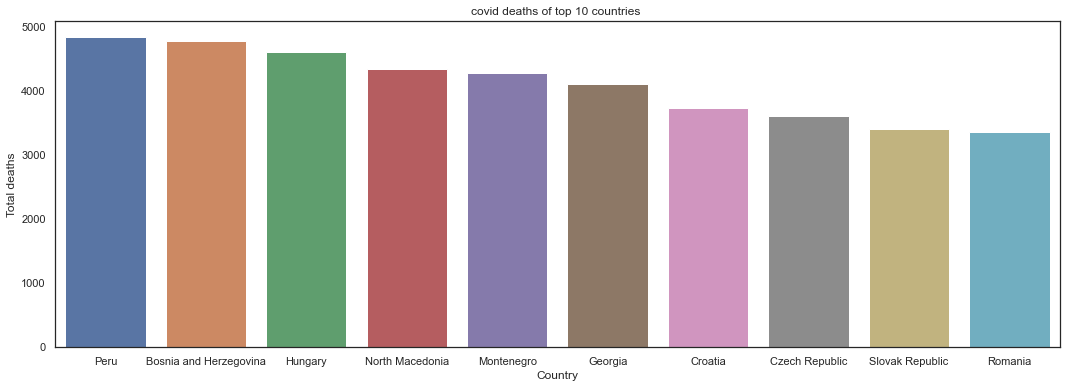

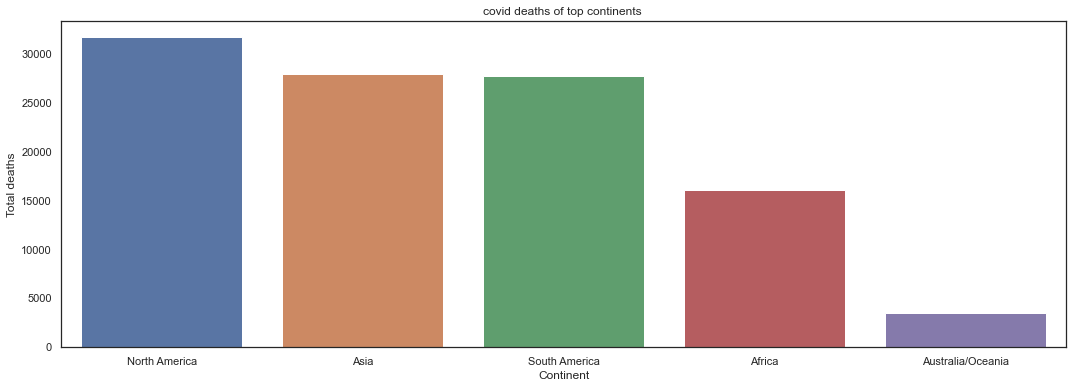

In [23]:
plt.figure(figsize=(18,6))
sns.barplot(x="Country", y="Total deaths", data=covid_dea)
plt.title("covid deaths of top 10 countries ")
plt.savefig('barplot1.png')
covid_deaths = DF.groupby('Continent')['Covid.deaths'].sum()
covid_deaths = covid_deaths.sort_values(ascending=False)
deaths_covid = covid_deaths[1:7].index

deaths = covid_deaths[1:7].values 
covid_dea = pd.DataFrame({'Continent': deaths_covid, 'Total deaths': deaths})
print(covid_dea)

plt.figure(figsize=(18,6))
sns.barplot(x="Continent", y="Total deaths", data=covid_dea)
plt.title("covid deaths of top continents ")
plt.savefig('barplot1.png')





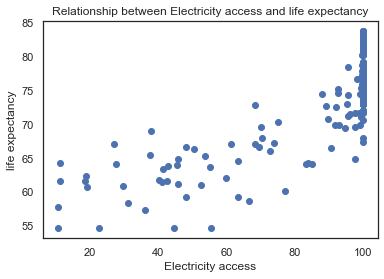

In [24]:
#scatter plots
DF.columns

plt.scatter(DF['Elect.access'], DF['Life.expec'])
plt.title("Relationship between Electricity access and life expectancy")
plt.xlabel('Electricity access')
plt.ylabel('life expectancy')
plt.show()

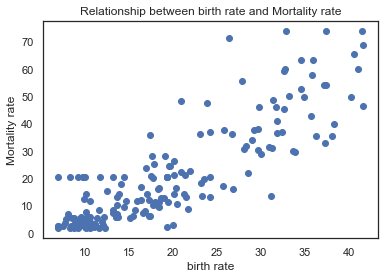

In [25]:
#scatter plots for birthrate and moralityrate
plt.scatter(DF['Birth.rate'], DF['Mortality.rate'])
plt.title("Relationship between birth rate and Mortality rate")
plt.xlabel('birth rate')
plt.ylabel('Mortality rate')
plt.show()



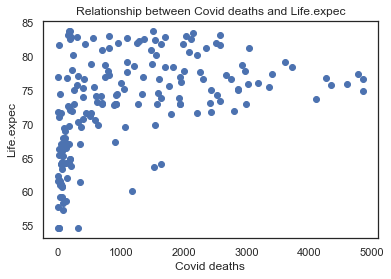

In [26]:
#scatter plots for covid.deaths and Life.expec
plt.scatter(DF['Covid.deaths'], DF['Life.expec'])
plt.title("Relationship between Covid deaths and Life.expec")
plt.xlabel('Covid deaths')
plt.ylabel('Life.expec')
plt.show()

<AxesSubplot:>

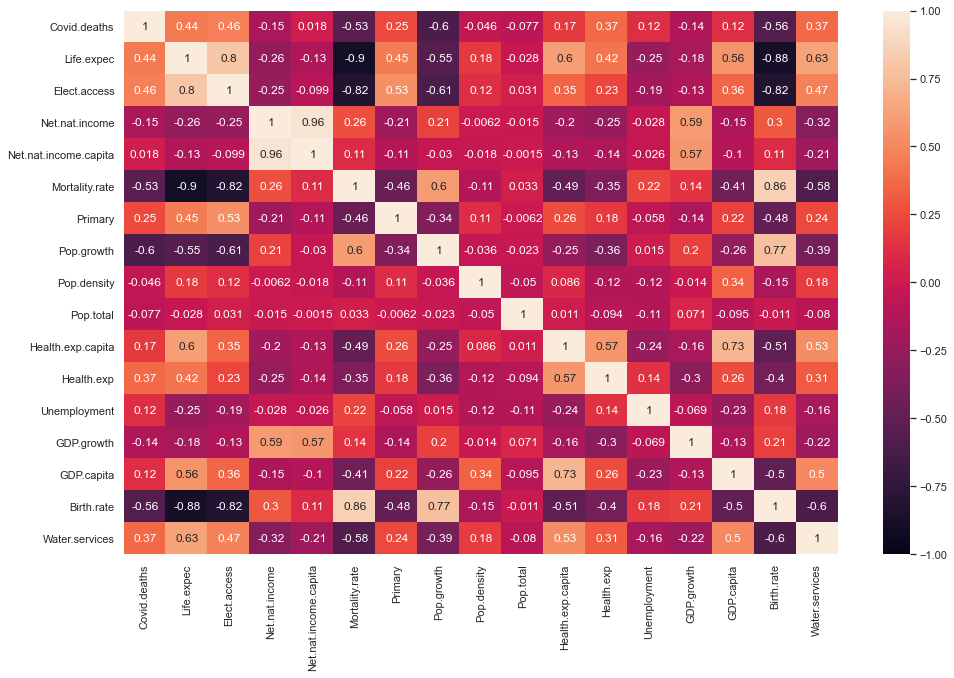

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(DF.corr(),vmin=-1,annot=True)

In [28]:
for col in DF.columns:
    if(DF[col].dtype == 'object'):
        DF[col]= DF[col].astype('category')
        DF[col] = DF[col].cat.codes

<ipython-input-28-1ba11c52b168>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col]= DF[col].astype('category')
<ipython-input-28-1ba11c52b168>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[col] = DF[col].cat.codes


In [29]:
DF.columns
X = DF[[ 'Life.expec',
       'Elect.access', 'Net.nat.income', 'Net.nat.income.capita',
       'Mortality.rate', 'Primary', 'Pop.growth', 'Pop.density', 'Pop.total',
       'Health.exp.capita', 'Health.exp', 'Unemployment', 'GDP.growth',
       'GDP.capita', 'Birth.rate', 'Water.services']]

In [30]:
X.head()

,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services
0,64.833000,97.700000,4.280545,2.931443,46.4,84.330589,2.313073,58.269395,38041757.0,65.806030,11.959891,7.348571,3.911603,494.179350,31.802,26.798956
1,78.573000,100.000000,0.146477,0.574018,8.6,103.322746,-0.426007,104.167555,2854191.0,1196.707665,6.431587,11.470000,2.113420,5395.659532,11.620,70.665854
2,76.880000,99.500000,2.938149,0.966470,20.0,101.364632,1.933983,18.076295,43053054.0,248.205872,6.243371,7.348571,1.000000,3989.668276,23.583,73.139746
3,73.012812,100.000000,4.280545,2.931443,2.5,92.899360,0.179042,164.140425,77146.0,2744.194336,6.711585,7.348571,2.015548,40897.330870,7.000,90.640003
4,61.147000,45.670315,1.122570,-2.104145,49.9,92.899360,3.242914,25.527632,31825299.0,71.326004,2.533360,7.348571,-0.624644,2809.626088,40.232,73.600288


In [31]:
X_norm = (X - X.mean()) / X.std()
X_norm

,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services
0,-1.116693,0.475281,0.041774,0.045980,1.397254,-0.864813,0.979960,-0.259494,0.090680,-0.647718,2.361050,0.007454,0.376807,-0.710517,1.291882,-2.088627
1,0.760443,0.567520,-1.082612,-0.631853,-0.636266,1.050437,-1.503614,-0.212259,-0.420972,0.009228,0.008228,1.058739,-0.274560,-0.515353,-0.795099,-0.132683
2,0.529148,0.547468,-0.323332,-0.519011,-0.022982,0.852972,0.636232,-0.300858,0.163548,-0.541761,-0.071876,0.007454,-0.677881,-0.571336,0.441972,-0.022377
3,0.000819,0.567520,0.041774,0.045980,-0.964427,-0.000702,-0.955005,-0.150539,-0.461352,0.908170,0.127394,0.007454,-0.310013,0.898231,-1.272844,0.757927
4,-1.620268,-1.611305,-0.817133,-1.401908,1.585543,-0.000702,1.823063,-0.293190,0.000289,-0.644511,-1.650840,0.007454,-1.266386,-0.618322,2.163612,-0.001842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-0.128806,0.567520,0.041774,0.045980,0.036194,-0.000702,-2.217161,-0.286190,-0.047833,-0.489119,-0.444820,0.007454,0.017216,0.020410,-0.180235,-0.001842
181,0.326953,0.543458,0.797661,0.940633,-0.189752,-0.000702,-0.252075,0.000699,0.940153,-0.580965,-0.494796,-1.346644,1.501852,-0.622079,-0.295224,-0.001842
182,-0.940182,-0.525240,0.041774,0.045980,1.397254,-0.000702,0.968644,-0.262618,-0.038439,0.009228,0.008228,0.007454,0.017216,0.020410,1.092408,-0.001842
183,-1.246070,-1.718395,0.041774,0.045980,1.208965,-0.000702,1.505806,-0.294735,-0.202762,-0.645674,-0.468177,1.326571,-0.518024,-0.678233,1.702826,-0.001842


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


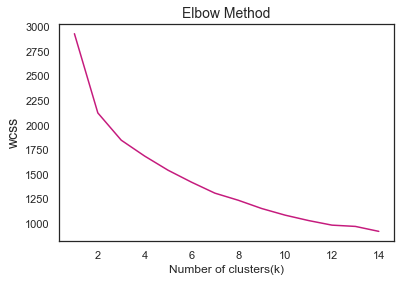

In [32]:
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=200, n_init=10, random_state=0)
    km.fit(X_norm)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss, c="#c51b7d")
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters(k)', size=12)
plt.ylabel('wcss', size=14)
plt.show() 


<AxesSubplot:>

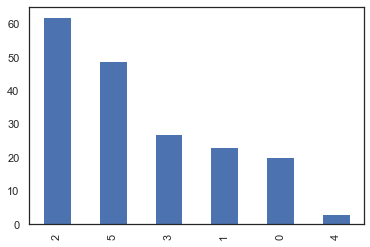

In [33]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=10, n_init=10, random_state=0)
res = X.copy()
res['Cluster_Prediction'] = kmeans.fit_predict(X_norm)
res.head()

kmeans.cluster_centers_

res.Cluster_Prediction.value_counts().plot.bar()

Text(0.5, 1.0, 'Clustering with Pca components ')

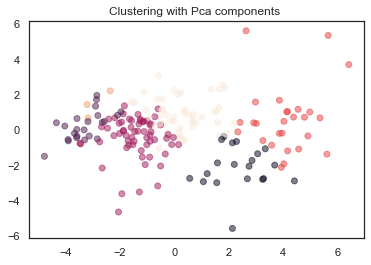

In [34]:
#clustering with pca components
pca = PCA(n_components=2).fit(X)
pca_2d = pca.fit_transform(X_norm)

plt.scatter(x=pca_2d[:,0], y=pca_2d[:,1], c=res['Cluster_Prediction'], alpha=0.5)
plt.title("Clustering with Pca components ")


In [35]:
DF_1= DF.copy()
DF_1['Cluster_Prediction'] = kmeans.fit_predict(X_norm)
DF_1.head()

,Country Name,Continent,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,...,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services,Comp.education,Cluster_Prediction
0,0,1,189.0,64.833000,97.700000,4.280545,2.931443,46.4,84.330589,2.313073,...,38041757.0,65.806030,11.959891,7.348571,3.911603,494.179350,31.802,26.798956,13,0
1,1,3,1210.0,78.573000,100.000000,0.146477,0.574018,8.6,103.322746,-0.426007,...,2854191.0,1196.707665,6.431587,11.470000,2.113420,5395.659532,11.620,70.665854,13,2
2,2,0,152.0,76.880000,99.500000,2.938149,0.966470,20.0,101.364632,1.933983,...,43053054.0,248.205872,6.243371,7.348571,1.000000,3989.668276,23.583,73.139746,1,2
3,3,3,1949.0,73.012812,100.000000,4.280545,2.931443,2.5,92.899360,0.179042,...,77146.0,2744.194336,6.711585,7.348571,2.015548,40897.330870,7.000,90.640003,1,2
4,4,0,55.0,61.147000,45.670315,1.122570,-2.104145,49.9,92.899360,3.242914,...,31825299.0,71.326004,2.533360,7.348571,-0.624644,2809.626088,40.232,73.600288,10,0


[]

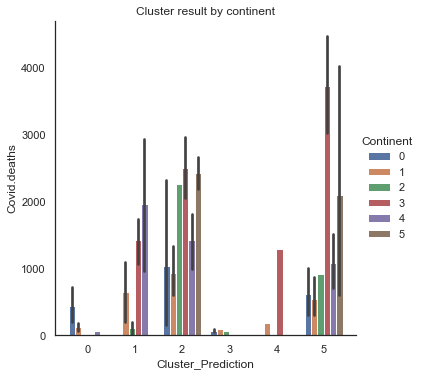

In [36]:
average_cluster = res.groupby(by='Cluster_Prediction').mean()
average_cluster.reset_index(inplace=True)
average_cluster

sns.catplot(x='Cluster_Prediction', y='Covid.deaths', hue='Continent', data=DF_1, kind='bar')
plt.title("Cluster result by continent")
plt.plot()


In [37]:
DF.head()

,Country Name,Continent,Covid.deaths,Life.expec,Elect.access,Net.nat.income,Net.nat.income.capita,Mortality.rate,Primary,Pop.growth,Pop.density,Pop.total,Health.exp.capita,Health.exp,Unemployment,GDP.growth,GDP.capita,Birth.rate,Water.services,Comp.education
0,0,1,189.0,64.833000,97.700000,4.280545,2.931443,46.4,84.330589,2.313073,58.269395,38041757.0,65.806030,11.959891,7.348571,3.911603,494.179350,31.802,26.798956,13
1,1,3,1210.0,78.573000,100.000000,0.146477,0.574018,8.6,103.322746,-0.426007,104.167555,2854191.0,1196.707665,6.431587,11.470000,2.113420,5395.659532,11.620,70.665854,13
2,2,0,152.0,76.880000,99.500000,2.938149,0.966470,20.0,101.364632,1.933983,18.076295,43053054.0,248.205872,6.243371,7.348571,1.000000,3989.668276,23.583,73.139746,1
3,3,3,1949.0,73.012812,100.000000,4.280545,2.931443,2.5,92.899360,0.179042,164.140425,77146.0,2744.194336,6.711585,7.348571,2.015548,40897.330870,7.000,90.640003,1
4,4,0,55.0,61.147000,45.670315,1.122570,-2.104145,49.9,92.899360,3.242914,25.527632,31825299.0,71.326004,2.533360,7.348571,-0.624644,2809.626088,40.232,73.600288,10


In [38]:
DF['Covid.deaths'].describe()
DF.loc[DF['Covid.deaths'] < 1500, 'binary_covid_deaths'] = 0
DF.loc[DF['Covid.deaths'] > 1500, 'binary_covid_deaths'] = 1
DF.head()

DF['binary_covid_deaths']=DF['binary_covid_deaths'].astype(int)

DF.binary_covid_deaths.value_counts()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

0    122
1     62
Name: binary_covid_deaths, dtype: int64

In [39]:
#Applying logistic regression on binary class
X_binary = DF.loc[:, DF.columns != 'binary_covid_deaths']
Y_binary= DF['binary_covid_deaths']

X_norm = (X_binary - X_binary.mean()) / X_binary.std()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_norm,Y_binary,test_size=0.2, random_state=42)

In [40]:
classifier = LogisticRegression()
 
res = cross_val_score(classifier , X_train, y_train, cv = KFold(n_splits=5, random_state=None))
 
print("Average accuracy: {}".format(res.mean()))

Average accuracy: 0.9593103448275861


In [41]:
from sklearn.metrics import classification_report
y_pred = classifier.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))


level_deaths= []

for k in DF['Covid.deaths']:
  if (k >= 0) & (k <= 500):
    level_deaths.append(0)

  elif (k >= 501) & (k <= 1500):
    level_deaths.append(1)
  elif (k >= 1501) & (k <= 3500):
    level_deaths.append(2)

  else:
    level_deaths.append(3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.94      0.94      0.94        16

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [42]:
DF['level_deaths'] = level_deaths
DF=DF.drop(['binary_covid_deaths'], axis = 1)
DF.head()
X_multi = DF.loc[:, DF.columns != 'level_deaths']
Y_multi= DF['level_deaths']
X_norm_2 = (X_multi - X_multi.mean()) / X_multi.std()

<ipython-input-42-9edc797329c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['level_deaths'] = level_deaths


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_norm_2,Y_multi,test_size=0.2, random_state=42)

classifier =  LogisticRegression(multi_class='multinomial', solver='lbfgs')
 
res = cross_val_score(classifier , X_train, y_train, cv = KFold(n_splits=5, random_state=None))
 
print("Avg accuracy: {}".format(res.mean()))

Avg accuracy: 0.7682758620689656


In [44]:
y_pred = classifier.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.83      0.71         6
           2       0.83      0.77      0.80        13
           3       1.00      0.67      0.80         3

    accuracy                           0.86        37
   macro avg       0.86      0.82      0.83        37
weighted avg       0.88      0.86      0.87        37



In [45]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='lsqr')

res = cross_val_score(lda , X_train, y_train, cv = KFold(n_splits=5, random_state=None))
 
print("Avg accuracy: {}".format(res.mean()))

Avg accuracy: 0.8843678160919539


In [46]:
y_pred = lda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.83      0.83         6
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00         3

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [47]:
#Quadraticdiscriminantanalysis
qda = QuadraticDiscriminantAnalysis()
res = cross_val_score(qda ,X_train, y_train, cv = KFold(n_splits=5, random_state=None))
print("Avg accuracy: {}".format(res.mean()))

y_pred = qda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

Avg accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.69      0.69      0.69        13
           3       0.00      0.00      0.00         3

    accuracy                           0.78        37
   macro avg       0.56      0.63      0.59        37
weighted avg       0.74      0.78      0.76        37



C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-package